# Import Package

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows=250
pd.options.display.max_columns=50

In [3]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
print(df['CarName'].unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [6]:
#mengubah tipe mobil menjadi brand saja
def extract_brand(str):
    return str.split(' ')[0]
df['CarName'] = df['CarName'].apply(extract_brand)
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [7]:
df['CarName'] = df['CarName'].replace(['maxda','Nissan','porcshce','vokswagen','vw','toyouta'],
                                      ['mazda','nissan','porsche','volkswagen','volkswagen','toyota'])
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


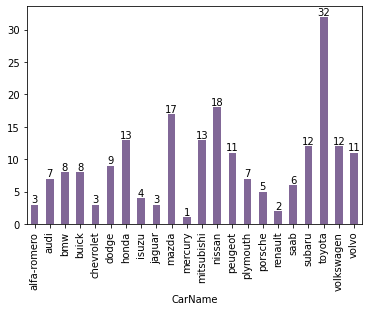

In [8]:
ax=df.groupby('CarName')['car_ID'].count().plot(kind = 'bar', color = '#816797')
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [10]:
df.drop(['car_ID'],axis=1,inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [11]:
print('fueltype      :',df['fueltype'].unique())
print('aspiration    :',df['aspiration'].unique())
print('doornumber    :',df['doornumber'].unique())
print('carbody       :',df['carbody'].unique())
print('drivewheel    :',df['drivewheel'].unique())
print('enginelocation:',df['enginelocation'].unique())
print('enginetype    :',df['enginetype'].unique())
print('cylindernumber:',df['cylindernumber'].unique())
print('fuelsystem    :',df['fuelsystem'].unique())

fueltype      : ['gas' 'diesel']
aspiration    : ['std' 'turbo']
doornumber    : ['two' 'four']
carbody       : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel    : ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype    : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem    : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [12]:
#Change string number to numeric
df['doornumber'] = df['doornumber'].replace(['four','two'],[4,2])
df['cylindernumber'] = df['cylindernumber'].replace(['four','six','five','eight','two','three','twelve'],[4,6,5,8,2,3,12])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
# Convert feature data type 
cat = ['doornumber','cylindernumber','symboling']

for item in cat :
    df[item] = df[item].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [14]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Boxplot Data

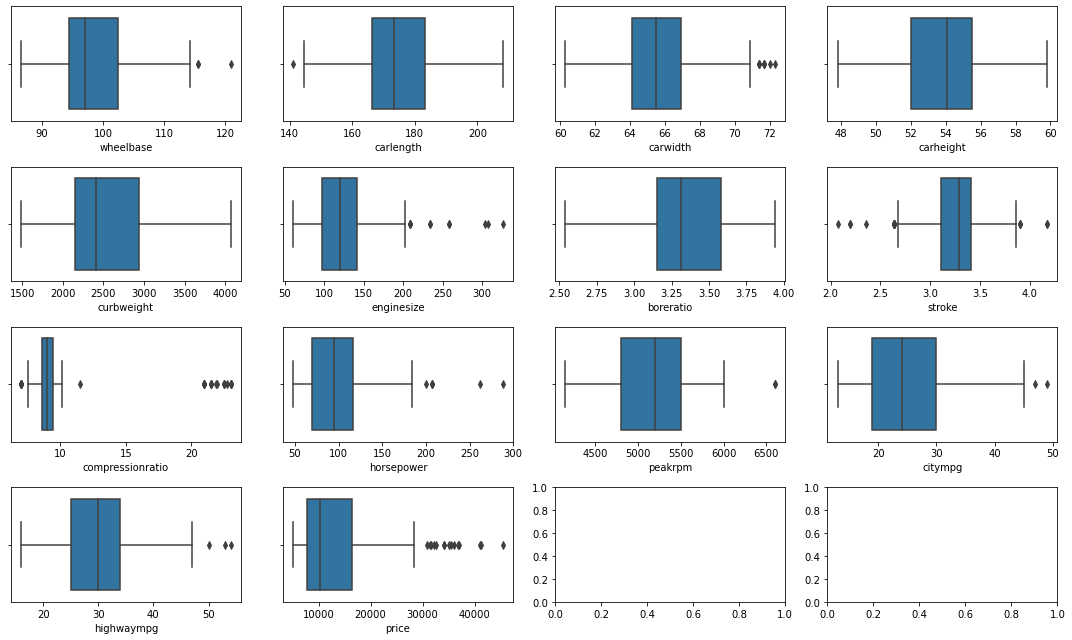

In [15]:
numeric=list(df.select_dtypes(exclude="object"))
fig, axes = plt.subplots(4,4, figsize=(15, 9))
for i, col in enumerate(numeric):        
    ax_ = sns.boxplot(x=df[col], ax=axes.flatten()[i])
plt.tight_layout()  

In [16]:
df[df['compressionratio']>12]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
63,0,mazda,diesel,std,4,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,4,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0
66,0,mazda,diesel,std,4,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,4,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
67,-1,buick,diesel,turbo,4,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,5,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
68,-1,buick,diesel,turbo,4,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,5,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
69,0,buick,diesel,turbo,2,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,5,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0
70,-1,buick,diesel,turbo,4,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,5,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
90,1,nissan,diesel,std,2,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,4,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
108,0,peugeot,diesel,turbo,4,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,4,152,idi,3.70,3.52,21.0,95,4150,28,33,13200.0
110,0,peugeot,diesel,turbo,4,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,4,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0
112,0,peugeot,diesel,turbo,4,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,4,152,idi,3.70,3.52,21.0,95,4150,28,33,16900.0


Berdasarkan Boxplot, terlihat beberapa variabel memiliki outlier yang jaraknya cukup jauh. Namun, hal tersebut merupakan hal yang sah. Kejanggalan tersebut dapat dijelaskan dan bukan merupakan kejanggalan yang harus diperbaiki. Sebab kejanggalan tersebut memang merupakan spesifik dari mesin mobilnya

# Exploratory Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## Data Kategori

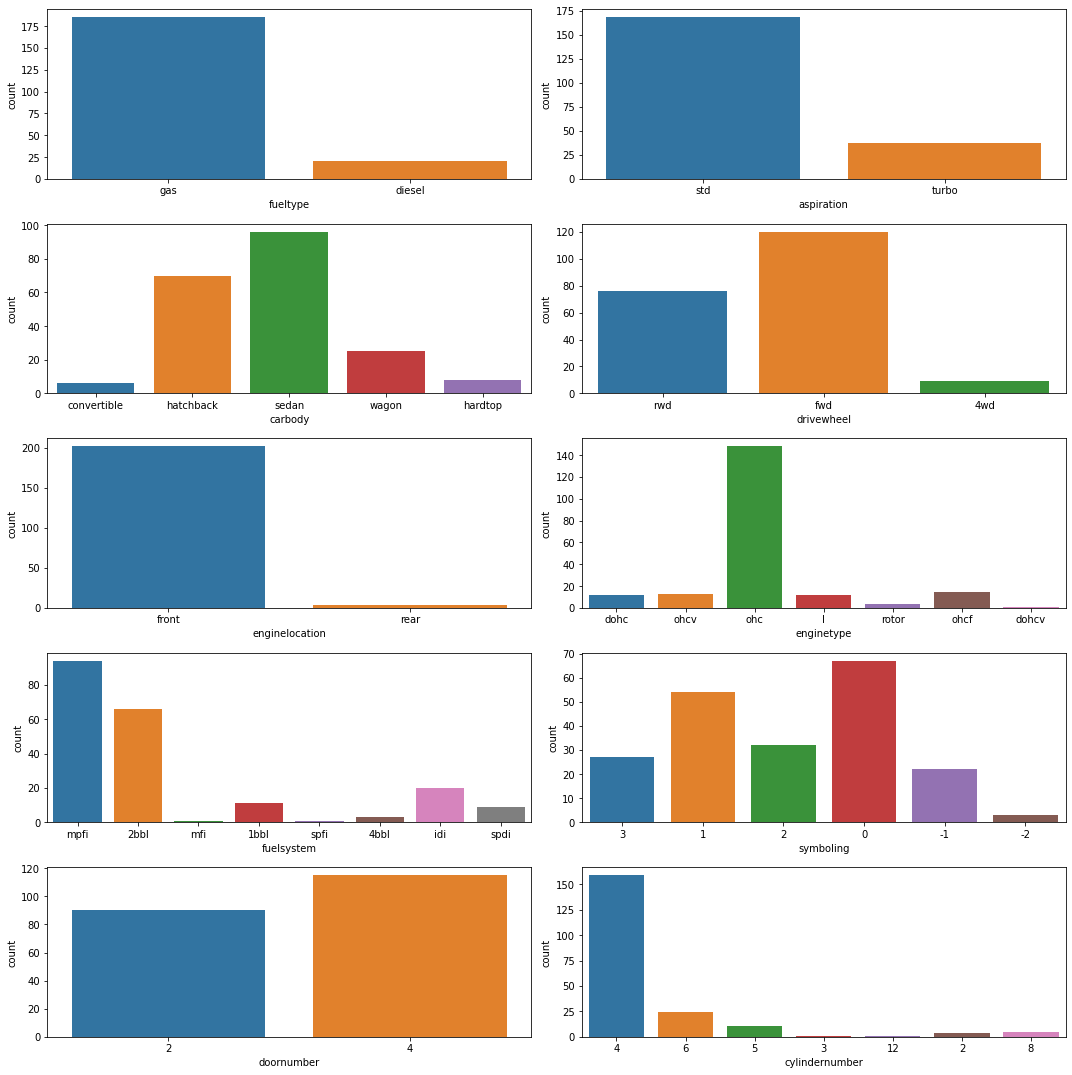

In [41]:
#count
kategori=['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','symboling','doornumber'
          ,'cylindernumber']
fig, axes = plt.subplots(5,2, figsize=(15,15))
for i, col in enumerate(kategori):
    column = df.columns[i+11]
    sns.countplot(x=df[col], data=df, ax = axes.flatten()[i])
plt.tight_layout() 

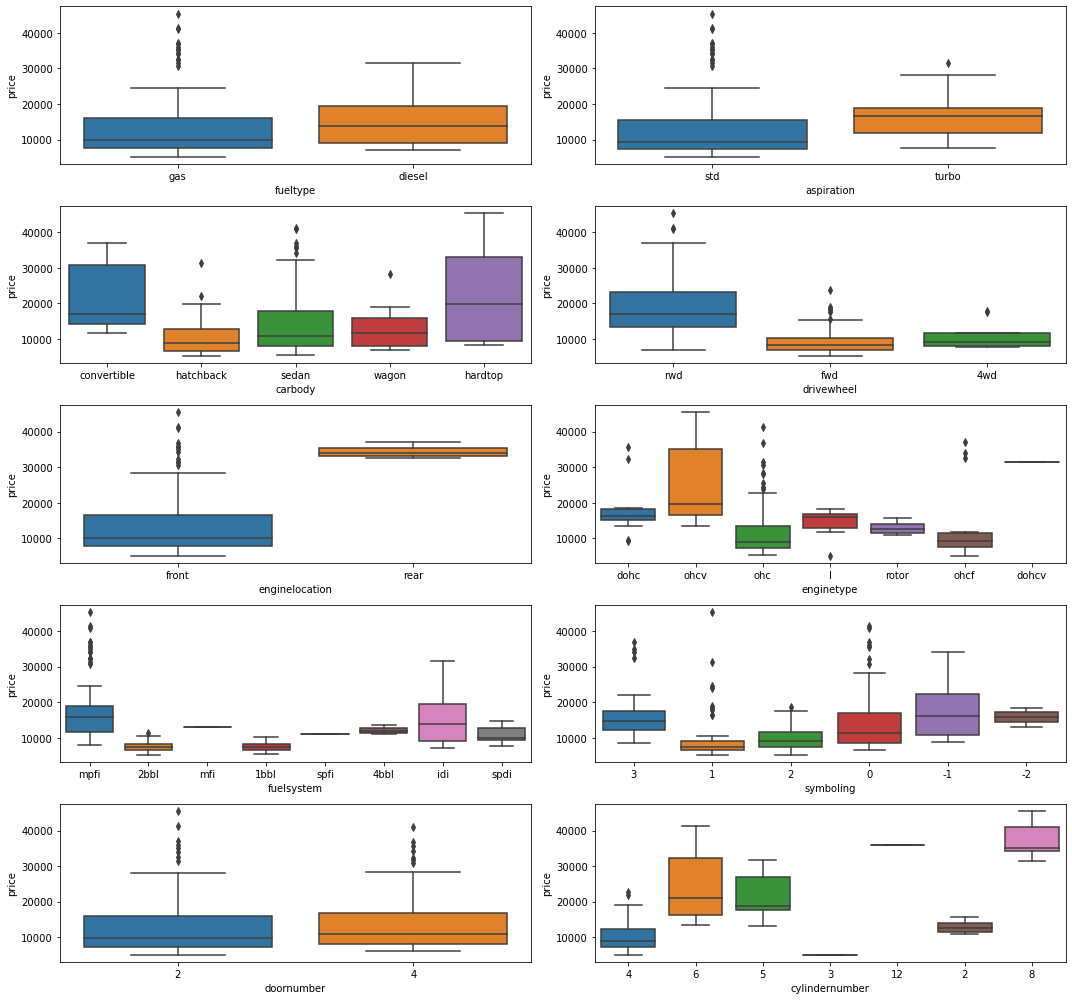

In [35]:
#Boxplot
fig, axes = plt.subplots(5,2, figsize=(15,14))
for i, col in enumerate(kategori):
    column = df.columns[i+11]
    sns.boxplot(x = df[col], y = 'price', data = df, ax = axes.flatten()[i])
plt.tight_layout() 

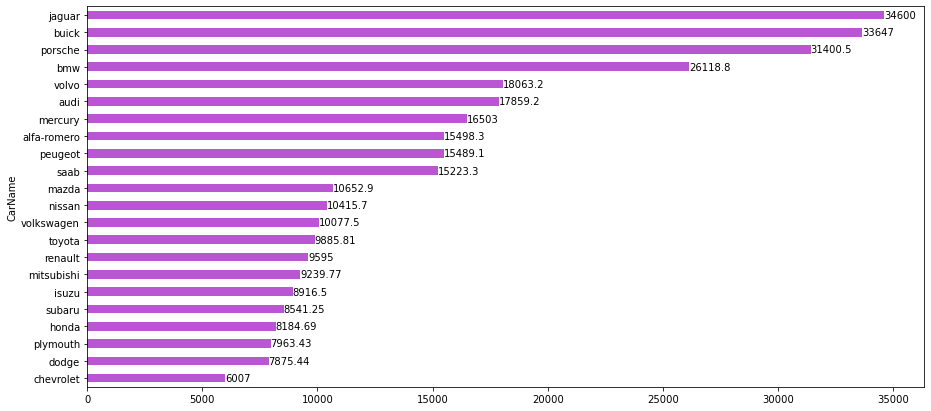

In [119]:
#Brand
ax=df.groupby('CarName').mean()['price'].sort_values(ascending=True).plot(kind = 'barh',color='mediumorchid',figsize=(15,7))
ax.bar_label(ax.containers[0])
plt.show()

Berdasarkan bar chart, dapat terilhat brand mempengaruhi harga mobil murah dan mahal. Sebab, rata-rata harga jual mobil di setiap brand memiliki perbedaan yang signifikan contohnya : brand chevrolet memiliki rata harga jual mobil sebesar 6007 sedangkan jaguar sebesar 34600 yang selisih harga jualnya sangat jauh. 

## Membuat Kategori Price

In [44]:
df["price_category"] = df["price"].apply(lambda x: "standard" if x <= 20000 else "high-end")
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_category
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,standard
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,standard
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,standard
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,standard
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,standard


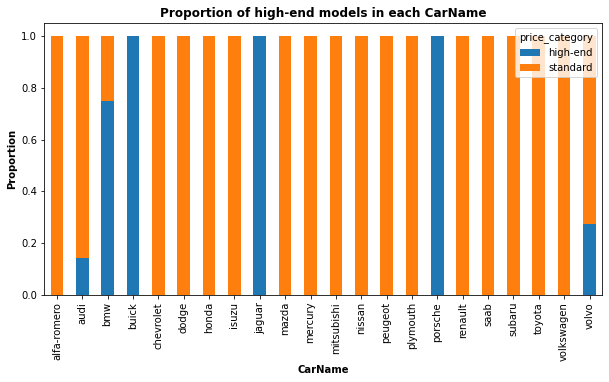

In [21]:
# proportion of high-end models in each CarName
pd.crosstab(df["CarName"], df["price_category"], normalize="index").plot.bar(stacked=True, figsize=(10,5))
plt.xlabel("CarName", fontweight="bold")
plt.ylabel("Proportion", fontweight="bold")
plt.title("Proportion of high-end models in each CarName", fontweight="bold")
plt.show()

Kategori mobil yang merupakan mobil 'high end' ialah porsche, buick, dan jaguar.   
80% mobil bmw merupakan mobil yang dapat dikatakan 'highend'  
50% mobil volvo merupakan mobil highend, dan 50% lainnya ialah standard.   
10% mobil audi merupakan mobil highend. dan sisanya ialah mobil standard  
kategori mobil lainnya, ialah mobil yang standard atau memiliki harga di bawah 20000 dollar

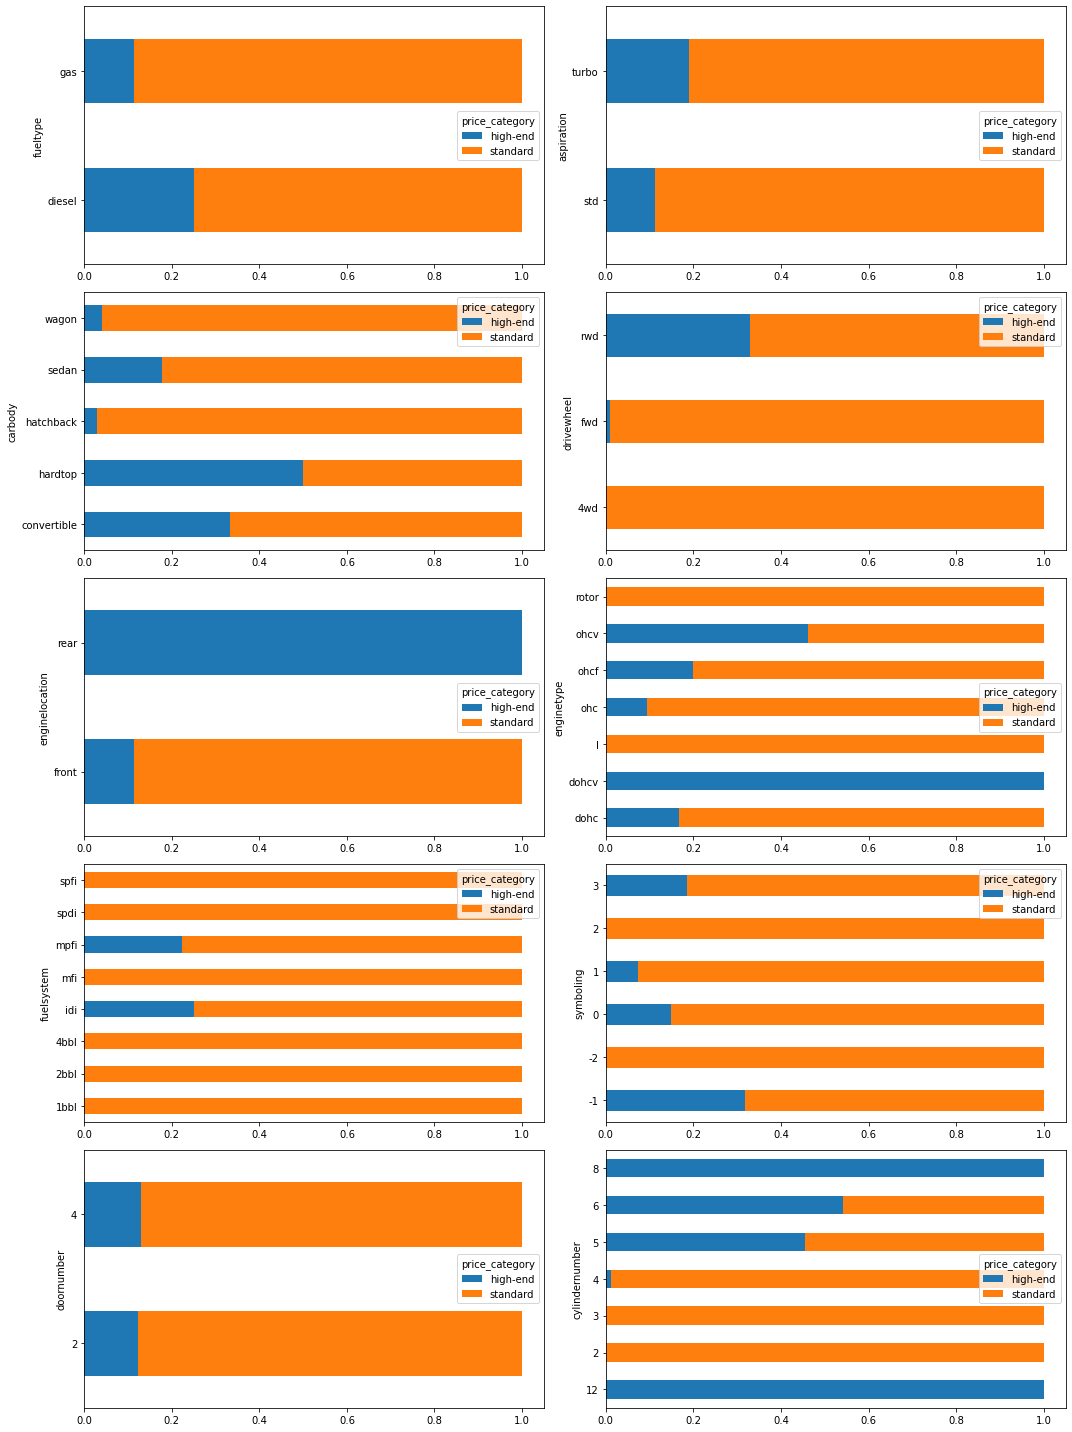

In [33]:
#Other Variabel
fig, axes = plt.subplots(5,2, figsize=(15,20))
for i, col in enumerate(kategori):
    pd.crosstab(df[col], df["price_category"], normalize="index").plot.barh(stacked=True, ax=axes.flatten()[i])
    ax[0].set(xlabel="Carbody type", ylabel="Proportion", title="Proportion of high-end models in each carbody type")
plt.tight_layout() 

fuel type 
- sebagian besar mobil yang memiliki bahan bakar gas/diesel merupakan mobil standard/murah 

aspiration 
- sebagian besar mobil yang mmeiliki aspiration turbo maupun std merupakan mobil yang standard/murah 

carbody 
- 50% mobil yang memiliki body hardtop merupakan mobil highend atau mahal
- mobil yang memiliki body wagon atay hatchback sebagian besar merupakan mobil murah 

drivewheel 
- 30% mobil yang memiliki drivewheel rwd merupakan mobil mahal 
- sebagian besar mobil yang memiliki drivewheel fwd atau 4wd merupakan mobil murah 

enginelocation 
- mobil yang mesinnya terletak di samping dikatakan sebagai mobil mahal 
- sedangkan mobil yang mesinnya terletak di depan dikatakan mobil murah 

enginetype 
- mobil yang mesinnya bertype dohcv merupakan mobil mahal 
- sedangkan mobil yang mesinnya bertype rotor ialah mobil murah 

fuelsystem 
- 20% mobil yang memiliki fuel system mpfi dan idi dikatakan mobil highend atau mahal
- sedangkan mobil yang memiliki fuelsystem selainnya dikatakan mobil murah 

symboling 
- 30% mobil yang memiliki tingkat keamanan yang tinggi mmeiliki harga yang mahal 

doornumber 
- sebagian besar mobil yang memiliki 2 pintu maupun 4 pintu merupakan mobil yang dikatakan standard / murah 

cylinder number 
- mobil yang dikatakan mhal atau highend ialah mobil yang memiliki cylinder number sebnayak 8/12 
- sedangkan mobil yang memiliki cylinder number 2/3 dikatakan sebagai mobil murah

## Data Numeric

### Statistik Deskriptif

Berikut statistik deskriptif variabel numerik pada data set Car Prediction. 

In [122]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.76,6.02,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.05,12.34,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.91,2.15,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.26,0.31,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.14,3.97,7.00,8.60,9.00,9.40,23.00
horsepower,205.0,104.12,39.54,48.00,70.00,95.00,116.00,288.00


### Korelasi

In [123]:
df.corr().style.background_gradient()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


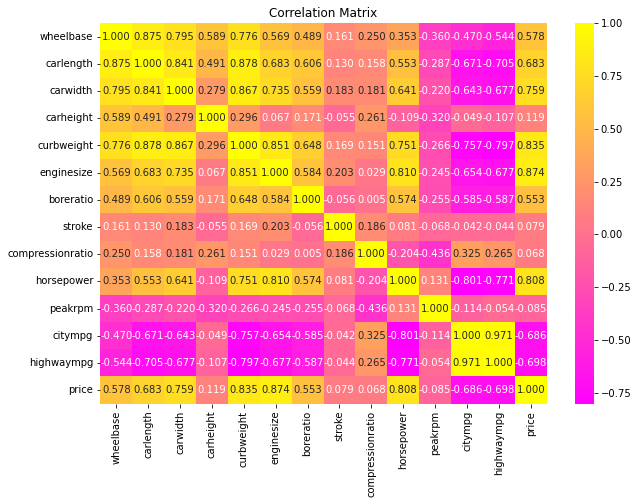

In [124]:
plt.figure(figsize=(10,7))
sns.heatmap(data= df.corr(), annot=True,cmap='spring', fmt=".3f").set_title("Correlation Matrix")
plt.show()

In [125]:
data_cat = df.select_dtypes('object')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# create a dataframe to store label encoded values
data_cat_le = data_cat.copy()

for i in data_cat.columns:
    le.fit(data_cat[i])
    data_cat_le[i] = le.transform(data_cat[i]).copy()

from sklearn.feature_selection import SelectKBest,f_classif
y = df['price']
select = SelectKBest(f_classif)
select.fit(data_cat_le, y)

p_values = pd.Series(select.pvalues_,index = data_cat.columns)
p_values.sort_values(ascending = True)

C:\Users\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


enginelocation    0.000000
price_category    0.000000
cylindernumber    0.000044
fuelsystem        0.000206
drivewheel        0.000217
aspiration        0.000283
carbody           0.005630
CarName           0.046612
doornumber        0.047604
symboling         0.047947
fueltype          0.197350
enginetype        0.351299
dtype: float32

### Scatter Plot

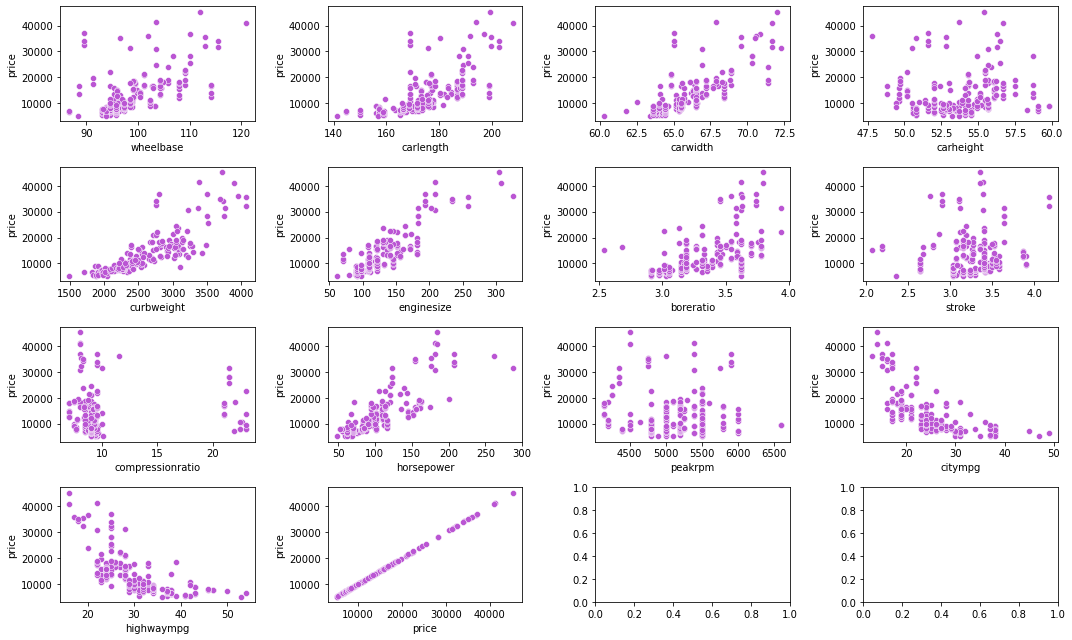

In [126]:
fig, axes = plt.subplots(4,4, figsize=(15, 9))
for i, col in enumerate(numeric):        
    ax_ = sns.scatterplot(data = df, x=df[col], y='price',color='mediumorchid', ax=axes.flatten()[i])
plt.tight_layout() 

Berdasarkan koefisien korelasi yang didapatkan pada heat map, variabel enginesize dengan price memiliki nilai korelasi tertinggi  sebesar 0.874. Hal ini dapat dilihat pula pada scatterplot variabel tersebut yang memiliki visualisasi sebaran data yang membentuk pola garis lurus dengan korelasi positif. Dimana ketika enginesize meningkat, maka harga mobil juga akan meningkat.

Variabel-variabel yang tampak dikatakan sebagai faktor yang dapat membedakan mobil ‘murah’ dan mobil ‘mahal’
- Variabel dengan korelasi positif : wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, dan horsepower
- Variabel dengan korelasi negatif : citympg dan highwaympg

Untuk variabel lainnya, dapat dilihat memiliki korelasi yang relatif sangat kecil dan pada scatter plot sebaran data yang ada tidak menunjukkan suatu pola atau dapat dikatakan memiliki sebaran acak. Sehingga diasumsikan variabel tidak dapat dikatakan sebagai faktor yang dapat membedakan mobil ‘murah’ dan mobil ‘mahal’

# Modelling

In [160]:
#One Hot Encoding
baseline=pd.get_dummies(df,drop_first=True)
baseline.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price_category_standard
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000,0,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000,0,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000,0,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000,0,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000,0,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


## Baseline

In [161]:
X = baseline.drop(['price'], axis=1)
y = baseline['price']

In [162]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [163]:
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [ 3.05919229e+02 -1.40260911e+02  3.90203634e+02 -2.56189271e+02
  6.85645260e+00  3.13014743e+01 -2.47420744e+03 -3.33567254e+02
 -7.01730671e+02  3.75645156e+01  1.11078387e+00  9.20301983e+01
 -6.98064628e-01 -1.59521376e+02  5.17881738e+02  5.27487414e+02
  9.99110586e+02  7.65267683e+02 -5.90023926e+02  2.56755178e+03
 -1.01862636e+03 -4.44916145e+03 -5.07637061e+03 -2.35595092e+03
 -4.73848843e+03 -2.28218260e+03 -2.42500257e+03 -4.77073254e+03
 -5.24654445e+03 -2.10962022e+03 -3.04225976e+03 -4.91698397e+03
  5.41962045e+03 -6.36646291e-12 -3.38222244e+01 -3.72585423e+03
 -3.46752839e+03 -2.60269647e+03 -2.73290358e+03 -5.35820437e+03
  3.54237256e+02  8.59776294e+02 -3.44899356e+03 -2.45317206e+03
 -2.18899905e+03 -2.75153348e+03  5.81967693e+02  1.57806620e+03
  5.41962045e+03 -1.81898940e-12 -3.04225976e+03  5.45864792e+02
  1.69376622e+03 -1.21017836e+03  1.88322459e+03  1.88322459e+03
 -1.36424205e-12  5.26739004e+02 -1.34494296e+03 -1.78999898e+03
  2.750548

In [164]:
y_pred = reg.predict(X_test)

In [165]:
# MAE
from sklearn.metrics import mean_absolute_error
print("MAE :",mean_absolute_error(y_test, y_pred))
# MSE
from sklearn.metrics import mean_squared_error
print("MSE :",mean_squared_error(y_test, y_pred))
# RMSE
from sklearn.metrics import mean_squared_error
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))
# R2
from sklearn.metrics import r2_score
print("R2 :",r2_score(y_test, y_pred))

MAE : 2314.1493200646432
MSE : 13321389.074476065
RMSE : 3649.8478152487487
R2 : 0.8279253974173915


In [166]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_category
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,standard
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,standard
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,standard
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,standard
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,standard
5,2,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,standard
6,1,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,standard
7,1,audi,gas,std,4,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,standard
8,1,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,high-end
9,0,audi,gas,turbo,2,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,standard


# Linear, Ridge, Lasso Regression

In [167]:
reg=df.drop(['stroke'],axis=1)
reg

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_category
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,9.00,111,5000,21,27,13495.000,standard
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,9.00,111,5000,21,27,16500.000,standard
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,9.00,154,5000,19,26,16500.000,standard
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,10.00,102,5500,24,30,13950.000,standard
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,8.00,115,5500,18,22,17450.000,standard
5,2,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,8.50,110,5500,19,25,15250.000,standard
6,1,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,8.50,110,5500,19,25,17710.000,standard
7,1,audi,gas,std,4,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,8.50,110,5500,19,25,18920.000,standard
8,1,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,8.30,140,5500,17,20,23875.000,high-end
9,0,audi,gas,turbo,2,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,7.00,160,5500,16,22,17859.167,standard


In [168]:
#One Hot Encoding
reglin=pd.get_dummies(reg,drop_first=True)
reglin.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price_category_standard
0,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,5000,21,27,13495.000,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,5000,21,27,16500.000,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,9.0,154,5000,19,26,16500.000,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,10.0,102,5500,24,30,13950.000,0,0,0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,8.0,115,5500,18,22,17450.000,0,0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
5,99.8,177.3,66.3,53.1,2507,136,3.19,8.5,110,5500,19,25,15250.000,0,0,0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
6,105.8,192.7,71.4,55.7,2844,136,3.19,8.5,110,5500,19,25,17710.000,0,0,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,105.8,192.7,71.4,55.7,2954,136,3.19,8.5,110,5500,19,25,18920.000,0,0,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8,105.8,192.7,71.4,55.9,3086,131,3.13,8.3,140,5500,17,20,23875.000,0,0,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9,99.5,178.2,67.9,52.0,3053,131,3.13,7.0,160,5500,16,22,17859.167,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [169]:
X = reglin.loc[:, reglin.columns != 'price']
y = reglin['price']

In [170]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [171]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

C:\Users\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92998372.87079737, tolerance: 984492.2252665486
  model = cd_fast.enet_coordinate_descent(


In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t\t MSE \t\t MAE \t\t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 			 MSE 		 MAE 			 R2
LinearRegression 	 3596.66 		 12935971.21 	2301.93 		0.83
LassoRegression 	 4699.54 		 22085656.12 	2611.09 		0.71
RidgeRegression 	 3303.99 		 10916325.45 	2140.58 		0.86


# Random Forest

Model				 RMSE 			 MSE 			 MAE 			 R2
Random Forest Regressor 	 2673.89 		 7149665.51 		1816.93 		0.91


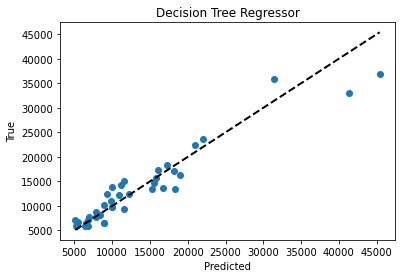

In [173]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t\t MSE \t\t\t MAE \t\t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()

In [175]:
X = reglin.loc[:, reglin.columns != 'price']
y = reglin['price']

In [176]:
from sklearn.metrics import mean_squared_error as mse

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

In [178]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mse(y_test, rf_pred))
print('Model has RMSE:', rf_rmse)
print('Model has R2-Score:', r2_score(y_test, rf_pred))

Model has RMSE: 2144.9644728561025
Model has R2-Score: 0.91627245797416


# Decision Tree

Model				 RMSE 			 MSE 			 MAE 			 R2
Decision Tree Regressor 	 2482.52 		 6162896.79 		1536.74 		0.89


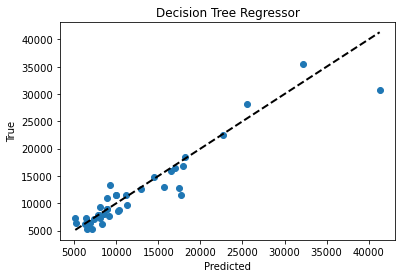

In [179]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t\t MSE \t\t\t MAE \t\t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [180]:
from sklearn.tree import DecisionTreeRegressor

In [181]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [182]:
y_pred = dt.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))

R-squared: 0.8864462771182328


## Random Forest Tuning

In [183]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [184]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, verbose=3)

In [185]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

In [186]:
new_rf_pred = rf_random.best_estimator_.predict(X_test)
new_rf_rmse = np.sqrt(mse(y_test, new_rf_pred))
print('New Model has RMSE:', new_rf_rmse)
print('New Model has R2-Score:', r2_score(y_test, new_rf_pred))

New Model has RMSE: 2341.52663107488
New Model has R2-Score: 0.9002239427659129


Hyperparameter tuning pada Random Forest tidak membuat model menjadi lebih baik

Jadi, dapat disimpulkan model terbaik menggunakan Random Forest dengan parameter :

In [187]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Karena dari 5 model yang ada, model Random Forest memiliki nilai R2-Score tertinggi dibandingkan model lainnya